<a href="https://colab.research.google.com/github/hariomshahu/image-processing/blob/main/HandlingGaussianNoise_and_SaltNPepperNoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Removing Gaussian Noise
1. ***Most convolution-based smoothing filters act as lowpass frequency filters.*** This means that their effect is to remove high spatial frequency components from an image. The frequency response of a convolution filter, i.e. its effect on different spatial frequencies, can be seen by taking the Fourier transform of the filter.
2. ***Both filters attenuate high frequencies more than low frequencies, but the mean filter exhibits oscillations in its frequency response. The Gaussian on the other hand shows no oscillations. In fact, the shape of the frequency response curve is itself (half a) Gaussian.*** So by choosing an appropriately sized Gaussian filter we can be fairly confident about what range of spatial frequencies are still present in the image after filtering, which is not the case of the mean filter. ***so, we can say that Gaussian filter work well with gaussian noise as compared to mean filter.***
3. ***if the noise is high, then using bilateral filter is more efficent as it can remove the noise and also preserve the edges more effectively as compared to gaussian filter***
4. Parameters of Bilateral Filter:
    * src: Input image.
    * d: Diameter of each pixel neighborhood. Larger d means that farther pixels will influence each other. The recommended value is about half of sigmaSpace.
    * sigmaColor: Filter sigma in the color space. A larger value means that farther colors within the pixel neighborhood (see d) will be mixed together, resulting in larger areas of semi-equal color.
    * sigmaSpace: Filter sigma in the coordinate space. A larger value means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor).
    * dst (optional): Output image of the same size and type as src.
    * borderType (optional): Pixel extrapolation method. Default is cv2.BORDER_DEFAULT.


5. high gaussian noise image:
  * If you have a noisy image and you want to preserve structures while reducing noise effectively, you'll need to carefully choose the parameters for the bilateral filter. Here's a general guideline:

  * sigmaColor: Set a small to moderate value for sigmaColor to preserve edges and structures. A smaller value ensures that only pixels with very similar colors are considered for filtering. This helps in preserving sharp edges and fine details in the image.
  * sigmaSpace: Set a larger value for sigmaSpace to allow pixels that are spatially distant but have similar colors to influence each other. This helps in smoothing out noise while preserving structures and edges. However, you don't want to set it too high, as it might blur out important details.
  * ***Here's an example of parameter values you might start with:
  sigmaColor: 10-30
  sigmaSpace: 50-100***
  * These values are approximate and may need to be adjusted based on the specific characteristics of your image and the level of noise present. It's often a process of trial and error to find the optimal values that provide the desired balance between noise reduction and structure preservation.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


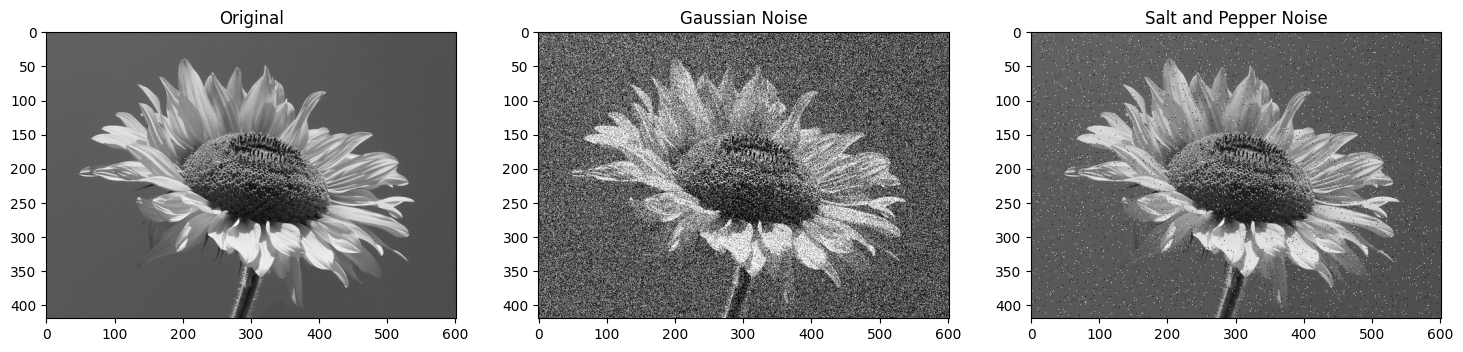

In [2]:
import numpy as np
from skimage.util import random_noise
import matplotlib.pyplot as plt
import cv2

# Load an image
image_path = "/content/drive/MyDrive/Colab Notebooks/image_processing_sample_data/sample_1.jpeg"
image = cv2.imread(image_path)
# Convert image to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Add Gaussian noise using built-in function
stddev = 0.2
noisy_image_gaussian = random_noise(image, mode='gaussian', var=stddev**2)

# Add salt and pepper noise using built-in function
amount = 0.02
noisy_image_salt_pepper = random_noise(image, mode='s&p', amount=amount)

# Display original and noisy images
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image_gaussian, cmap='gray')
plt.title('Gaussian Noise')

plt.subplot(1, 3, 3)
plt.imshow(noisy_image_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Noise')

plt.show()


In [3]:
# Convert noisy images to uint8
# The step of converting the noisy images to uint8 is necessary because OpenCV functions,
# such as cv2.medianBlur, expect images to be of uint8 data type (pixel values ranging from 0 to 255).
# When you add Gaussian noise or salt and pepper noise using the random_noise function from scikit-image,
# the resulting image is in floating-point format with pixel values ranging from 0 to 1.

noisy_image_gaussian = np.uint8(255 * noisy_image_gaussian)
noisy_image_salt_pepper = np.uint8(255 * noisy_image_salt_pepper)

# Apply filters to the noisy image with Gaussian noise
mean_filtered_gaussian_noise = cv2.blur(noisy_image_gaussian, (3, 3))
median_filtered_gaussian_noise = cv2.medianBlur(noisy_image_gaussian, 5)
gaussian_filtered_gaussian_noise = cv2.GaussianBlur(noisy_image_gaussian, (5, 5), 2)
bilateral_filtered_gaussian_noise = cv2.bilateralFilter(noisy_image_gaussian, 90, 60, 180)

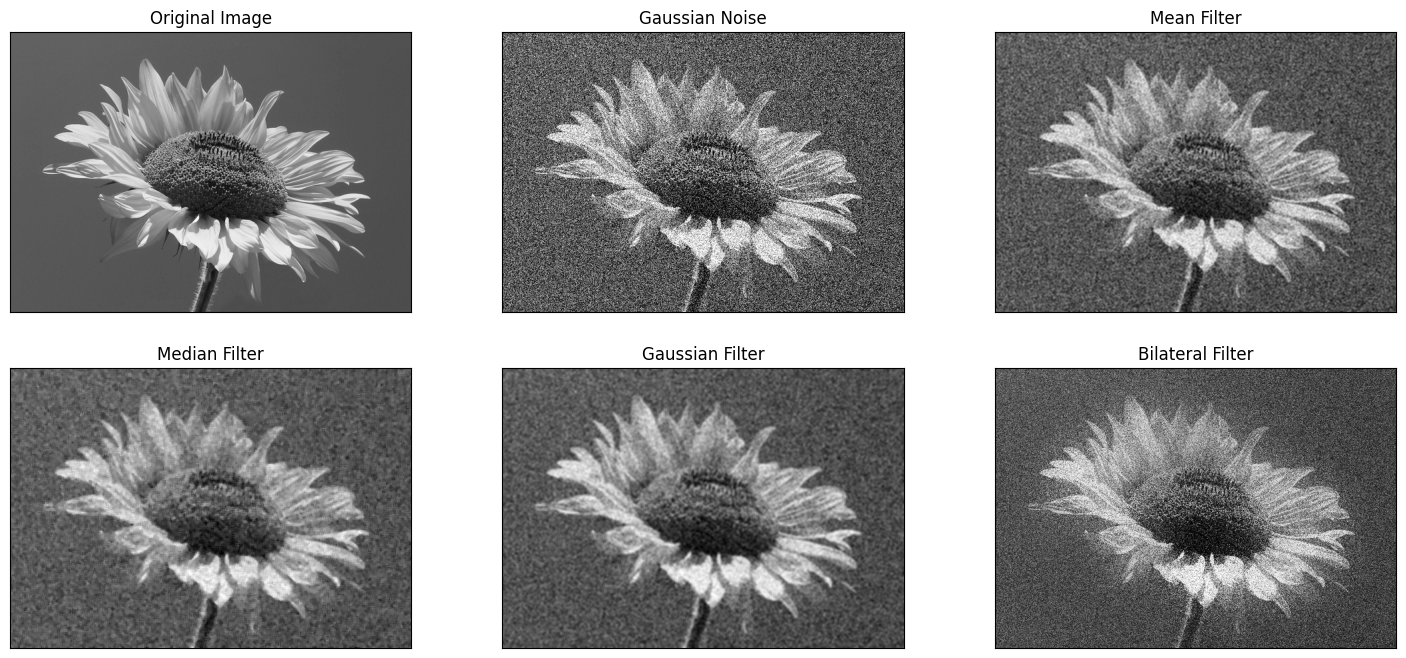

In [4]:
# Plotting the results of different filters on image having gaussian noise
plt.figure(figsize=(18, 8))

plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 2), plt.imshow(noisy_image_gaussian, cmap='gray')
plt.title('Gaussian Noise'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 3), plt.imshow(mean_filtered_gaussian_noise, cmap='gray')
plt.title('Mean Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 4), plt.imshow(median_filtered_gaussian_noise, cmap='gray')
plt.title('Median Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 5), plt.imshow(gaussian_filtered_gaussian_noise, cmap='gray')
plt.title('Gaussian Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 6), plt.imshow(bilateral_filtered_gaussian_noise, cmap='gray')
plt.title('Bilateral Filter'), plt.xticks([]), plt.yticks([])
plt.show()



# Removing Salt and Pepper Noise
* By calculating the median value of a neighborhood rather than the mean filter, the median filter has two main advantages over the mean filter:
  1. The median is a more robust average than the mean and so a single very unrepresentative pixel in a neighborhood will not affect the median value significantly.
  2. Since the median value must actually be the value of one of the pixels in the neighborhood, the median filter does not create new unrealistic pixel values when the filter straddles an edge. For this reason the median filter is much better at preserving sharp edges than the mean filter.

* to remove higher level of salt and pepper noise, Instead of using larger filter of 7x7 size, Alternatively, we can pass a 3×3 median filter over the image three times in order to remove all the noise with less loss of detail

* One of the major problems with the median filter is that it is relatively expensive and complex to compute. To find the median it is necessary to sort all the values in the neighborhood into numerical order and this is relatively slow, even with fast sorting algorithms such as quicksort. The basic algorithm can, however,be enhanced somewhat for speed. A common technique is to notice that when the neighborhood window is slid across the image, many of the pixels in the window are the same from one step to the next, and the relative ordering of these with each other will obviously not have changed. Clever algorithms make use of this to improve performance.

* **why gaussian filter is not capable of removing salt and pepper noise:**
  * Gaussian filters are not particularly effective at removing salt and pepper noise because they are designed to blur the image by averaging the pixel values in the neighborhood. Salt and pepper noise, on the other hand, introduces random high-intensity (salt) and low-intensity (pepper) outliers in the image, which are not effectively mitigated by simple blurring operations like those performed by Gaussian filters.

  * Here's why Gaussian filters are not ideal for removing salt and pepper noise:
    1. Averaging Effect: Gaussian filters compute the weighted average of pixel values in the neighborhood defined by the kernel size. However, salt and pepper noise introduces outliers that significantly differ from the neighboring pixel values. Averaging these outliers with the surrounding pixels does not effectively remove them and may even blur important details in the image.
    2. Loss of Detail: Gaussian filters tend to blur the image, which can result in the loss of important details, especially in areas with high-frequency information such as edges and textures. Thi

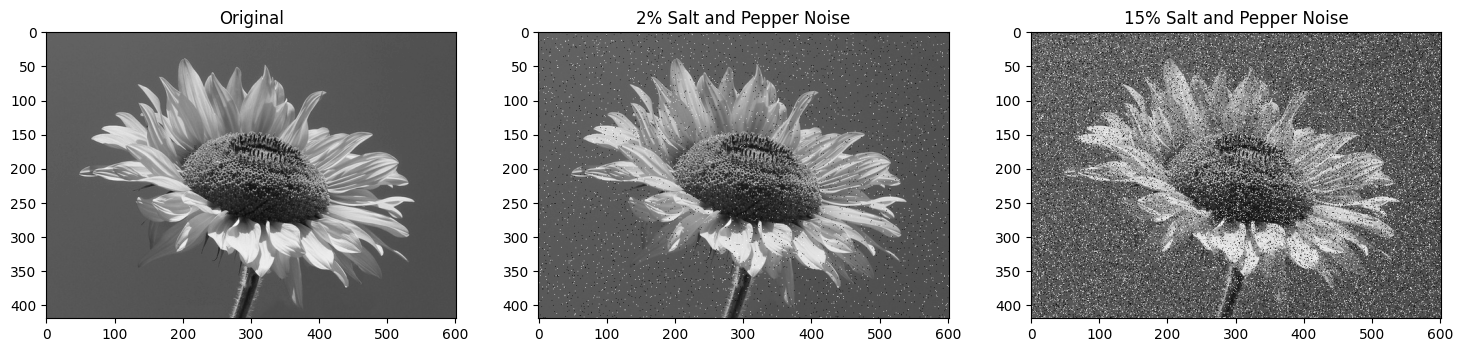

In [9]:

# Add salt and pepper noise using built-in function
amount1 = 0.02
amount2 = 0.15
noisy_image_salt_pepper_2_percent = random_noise(image, mode='s&p', amount=amount1)
noisy_image_salt_pepper_15_percent = random_noise(image, mode='s&p', amount=amount2)

# Display original and noisy images
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image_salt_pepper_2_percent, cmap='gray')
plt.title('2% Salt and Pepper Noise')

plt.subplot(1, 3, 3)
plt.imshow(noisy_image_salt_pepper_15_percent, cmap='gray')
plt.title('15% Salt and Pepper Noise')

plt.show()

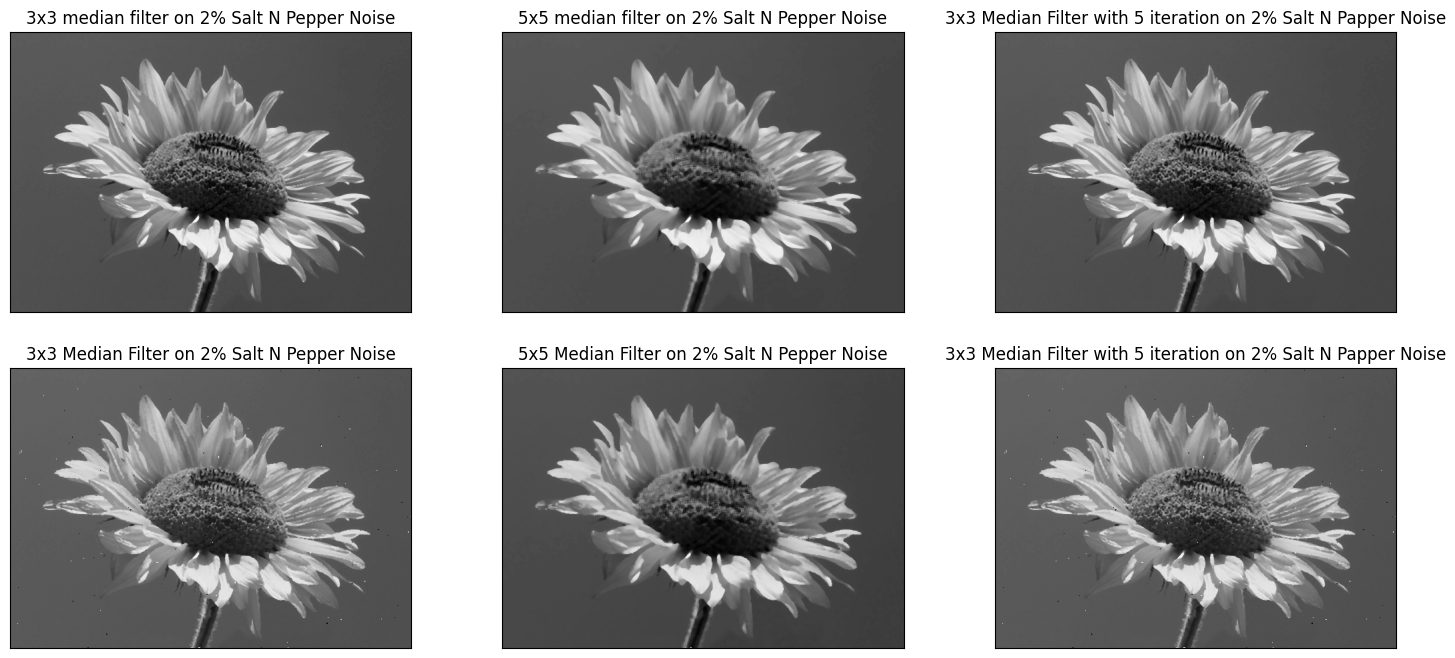

In [15]:
import cv2

noisy_image_salt_pepper_2_percent = np.uint8(255 * noisy_image_salt_pepper_2_percent)
noisy_image_salt_pepper_15_percent = np.uint8(255 * noisy_image_salt_pepper_15_percent)

# median filter with a 3x3 kernel
median_filter_3x3_2_percent_saltnpepper = cv2.medianBlur(noisy_image_salt_pepper_2_percent, 3)
median_filter_3x3_15_percent_saltnpepper = cv2.medianBlur(noisy_image_salt_pepper_15_percent, 3)

# median filter with a 5x5 kernel
median_filter_5x5_2_percent_saltnpepper = cv2.medianBlur(noisy_image_salt_pepper_2_percent, 5)
median_filter_5x5_15_saltnpepper = cv2.medianBlur(noisy_image_salt_pepper_15_percent, 5)

# median filter by repeatedly applying a 3x3 kernel
for i in range(5):
    median_filter_3x3_5_iteration_2_percent_saltnpepper = cv2.medianBlur(noisy_image_salt_pepper_2_percent, 3)
    median_filter_3x3_5_iteration_15_percent_saltnpepper = cv2.medianBlur(noisy_image_salt_pepper_15_percent, 3)

# Display the denoised images
plt.figure(figsize=(18, 8))

plt.subplot(2, 3, 1), plt.imshow(median_filter_3x3_2_percent_saltnpepper, cmap='gray')
plt.title('3x3 median filter on 2% Salt N Pepper Noise'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 2), plt.imshow(median_filter_5x5_2_percent_saltnpepper , cmap='gray')
plt.title('5x5 median filter on 2% Salt N Pepper Noise'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 3), plt.imshow(median_filter_3x3_5_iteration_2_percent_saltnpepper, cmap='gray')
plt.title('3x3 Median Filter with 5 iteration on 2% Salt N Papper Noise'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 4), plt.imshow(median_filter_3x3_5_iteration_15_percent_saltnpepper, cmap='gray')
plt.title('3x3 Median Filter on 2% Salt N Pepper Noise'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 5), plt.imshow(median_filter_5x5_15_saltnpepper, cmap='gray')
plt.title('5x5 Median Filter on 2% Salt N Pepper Noise'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 6), plt.imshow(median_filter_3x3_5_iteration_15_percent_saltnpepper, cmap='gray')
plt.title('3x3 Median Filter with 5 iteration on 2% Salt N Papper Noise'), plt.xticks([]), plt.yticks([])
plt.show()
